In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
# importing Dataset
data = pd.read_csv('DATA.csv')

In [3]:
data.head()

,DispositionScore,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD],TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],ImpactParameter,ImpactParameterUpperUnc.,ImpactParameterLowerUnc.,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2)],StellarSurfaceGravityLowerUnc.[log10(cm/s**2)],StellarRadius[Solarradii],StellarRadiusUpperUnc.[Solarradii],StellarRadiusLowerUnc.[Solarradii],RA[decimaldegrees],Dec[decimaldegrees],Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [4]:
# Splitting Features and Prediction target
features = data.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
target = data.ExoplanetCandidate

In [5]:
# Splitting Dataset into TEST and TRAIN
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.20)

In [6]:
# Checking if train test split ran correclty
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.8
0.2


In [7]:
# Evaluation function
def evaluation(y_true, y_pred):
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())

In [8]:
# Knn Model
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan',weights='uniform')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.820627802690583
Recall: 0.8446362515413071
F1 Score: 0.8303030303030303
Precision: 0.8164481525625745

Confusion Matrix:
 TN,  FP, FN, TP
[596 154 126 685]


In [9]:
# Decision Tree model
tree = DecisionTreeClassifier()

# Fitting Model to the train set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)


Evaluation Metrics:
Accuracy: 0.9365791159513133
Recall: 0.93711467324291
F1 Score: 0.9388511426806669
Precision: 0.9405940594059405

Confusion Matrix:
 TN,  FP, FN, TP
[702  48  51 760]


In [10]:
# Instantiate model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9583600256245997
Recall: 0.9395807644882861
F1 Score: 0.9590937696664569
Precision: 0.9794344473007712

Confusion Matrix:
 TN,  FP, FN, TP
[734  16  49 762]


In [11]:
# Comparing models
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
    y_pred = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [12]:
dtc_eval = evaluate_model(tree,X_test,y_test)
rf_eval = evaluate_model(forest,X_test,y_test)
knn_eval = evaluate_model(knn,X_test,y_test)

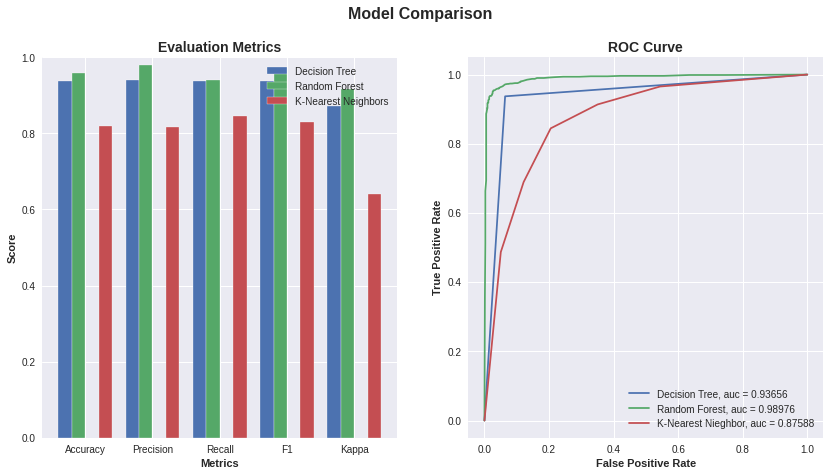

In [13]:
# Plotting the comparision
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)
plt.show()

## As we can see Random Forest is the best model

In [14]:
# Saving our model
filename = 'Exoplanet_detection_model.sav'
pickle.dump(forest, open(filename, 'wb'))